In [37]:
! pip install simpletransformers

     |████████████████████████████████| 221 kB 4.3 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 8.0 MB 38.1 MB/s 
     |████████████████████████████████| 1.6 MB 56.4 MB/s 
     |████████████████████████████████| 264 kB 57.5 MB/s 
     |████████████████████████████████| 2.6 MB 15.5 MB/s 
     |████████████████████████████████| 3.3 MB 38.2 MB/s 
     |████████████████████████████████| 124 kB 49.3 MB/s 
     |████████████████████████████████| 1.2 MB 40.2 MB/s 
     |████████████████████████████████| 636 kB 47.3 MB/s 
     |████████████████████████████████| 895 kB 50.7 MB/s 
     |████████████████████████████████| 170 kB 52.5 MB/s 
     |████████████████████████████████| 133 kB 54.5 MB/s 
     |████████████████████████████████| 97 kB 7.5 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 243 kB 52.3 MB/s 
     |████████████████████████████████| 118 kB 54.7 MB/s 
     |███████████████

In [1]:
import pandas as pd 

In [92]:
df

,Unnamed: 0,injury_report,tweet,kfold
0,0,0,hard https feeling nizbtc7jet,0
1,1,0,https x5cvdrbye staff number pitching put,0
2,2,0,well go tatis oxrycgvpom denver https join siz...,0
3,3,0,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,4,0,single time jakecrousemlb read,0
...,...,...,...,...
14922,14922,0,line kind craig game counsell libka brewer cle...,4
14923,14923,0,increase completely sweat initially usage earl...,4
14924,14924,0,bring d8zyjpt6q0 jlldt2hqua tothemoon https st...,4
14925,14925,0,2lt3lkdopw go week https mlb amp throw play,4


In [2]:
url = 'https://raw.githubusercontent.com/Jhagrut/Twitter-Project/main/Models/dft.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
df.head()

,Unnamed: 0,injury_report,tweet,kfold
0,0,0,hard https feeling nizbtc7jet,0
1,1,0,https x5cvdrbye staff number pitching put,0
2,2,0,well go tatis oxrycgvpom denver https join siz...,0
3,3,0,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,4,0,single time jakecrousemlb read,0


In [4]:
print(set(df['injury_report'].values))

{0, 1}


In [5]:
df.injury_report = pd.Categorical(df.injury_report)
df['injury_report'] = df['injury_report'].cat.codes
df = df.dropna()

In [21]:
df_new = df[["tweet", "injury_report"]]

In [22]:
df_new1 = df_new[df_new['injury_report']==0]
df_new2 = df_new[df_new['injury_report']==1]

In [23]:
df_new1

,tweet,injury_report
0,hard https feeling nizbtc7jet,0
1,https x5cvdrbye staff number pitching put,0
2,well go tatis oxrycgvpom denver https join siz...,0
3,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,single time jakecrousemlb read,0
...,...,...
14922,line kind craig game counsell libka brewer cle...,0
14923,increase completely sweat initially usage earl...,0
14924,bring d8zyjpt6q0 jlldt2hqua tothemoon https st...,0
14925,2lt3lkdopw go week https mlb amp throw play,0


In [34]:
df_new2['tweet'].sample(10).tolist()

['limping franco slip chase foul ball oriole field',
 'soreness wait certain start miss call peterson right david met result mri know',
 'kyle schwarber take camden yard field',
 'comebacker run arozarena pinch come margot game ray clase brett phillip indian beat able injury',
 'go pitch say ray fcl chris archer outing durham saturday',
 'come figure national swing cage need yan gome field rehab today eventually fine tee take toss mix day couple assignment etc think feel soft',
 'long santana come player red chavis position sense today sox activate plawecki friday wong catcher win plaw cordero case make way',
 'smith pitch cron head look game helmet riley walk rockie square take like hit',
 'assignment omaha gallagher tonight aaa cam royal begin rehab',
 'hand left game tonight leave sprain goodrum finger niko']

In [25]:
df_new1 = df_new1.sample(6000, replace = True)

In [26]:
df_new = pd.concat([df_new1,df_new2])

In [28]:
df_new.reset_index(drop = True, inplace = True)

In [29]:
df_new

,tweet,injury_report
0,long stick detroitroot short https end ormj0tu...,0
1,ru9hlue0vb close star https,0
2,omg,0
3,entrance excellent especially big burdi zack b...,0
4,vision loud pitch tidrow rip splguvypdf giant ...,0
...,...,...
7056,covid possibly depend testing player rapid tes...,1
7057,eickhoff waiver assignment surgery undergo roo...,1
7058,long close martinez go strasburg assignment pi...,1
7059,reinforcement long optioned arrive erick nat k...,1


In [96]:
from google.colab import files
df_new.to_csv("dft_sampled.csv")
files.download('dft_sampled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new['tweet'], df_new['injury_report'], random_state = 91, stratify = df_new['injury_report'], test_size = 0.2)

In [35]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, random_state=91)

In [38]:
from simpletransformers.classification import ClassificationModel

In [ ]:
df_new

In [9]:
train

,tweet,injury_report
3427,inning pitch kevin game https kf442iktby wilme...,0
1428,2019trenton pick vito mike olshin nice,0
14427,sleep catch boo richardstaff,0
11288,eddie https ourcle fg49wxs4o4 crush,0
6649,john klingberg kennlandry,0
...,...,...
10077,philly zma75wyn3n juntosmiami ballysportsfl ht...,0
210,oyg00xu6lw paul https boye,0
12138,sox suarez start webelieve https izj7tcmmot ba...,0
1710,2006 goal change end entire break red szztspnr...,0


In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install Counter

  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=f5f463e15b1287b01228707cf8a34c95348876de9734971d91ee875d10b2b939
  Stored in directory: /root/.cache/pip/wheels/f9/15/75/7a0462a00beb08e391f5da370ca409b56781d2501dba083fa3
Successfully built Counter


In [39]:
import collections

In [40]:
import imblearn  
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
train["injury_report"]

3427     0
1428     0
14427    0
11288    0
6649     0
        ..
10077    0
210      0
12138    0
1710     0
14514    0
Name: injury_report, Length: 11195, dtype: int8

In [18]:
counter = collections.Counter(train["injury_report"])
print(counter)

Counter({0: 10394, 1: 801})


In [19]:
smt = SMOTE()

In [20]:
smt.fit_resample(train["tweet"],train["injury_report"])

ValueError: ignored

In [41]:
# set use_cuda=False on CPU-only platforms
bert = ClassificationModel('roberta', 'roberta-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 3,
})
bert.train_model(train)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/5648 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/706 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm


Running Epoch 1 of 3:   0%|          | 0/706 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/706 [00:00<?, ?it/s]

(2118, 0.2207201054571258)

In [42]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#others
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.special import softmax

In [43]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=sklearn.metrics.accuracy_score)
print(result)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1413 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/177 [00:00<?, ?it/s]

{'mcc': 0.8089283128458155, 'tp': 181, 'tn': 1162, 'fp': 39, 'fn': 31, 'auroc': 0.949515340989427, 'auprc': 0.8444671116734234, 'acc': 0.9504600141542817, 'eval_loss': 0.19706731596909}


In [44]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=confusion_matrix)
result

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1413 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/177 [00:00<?, ?it/s]

{'acc': array([[1162,   39],
        [  31,  181]]),
 'auprc': 0.8444671116734234,
 'auroc': 0.949515340989427,
 'eval_loss': 0.19706731596909,
 'fn': 31,
 'fp': 39,
 'mcc': 0.8089283128458155,
 'tn': 1162,
 'tp': 181}

In [65]:
import torch
torch.save(bert, '/roberta')

In [45]:
cm = result["acc"]

recall = np.mean(np.diag(cm) / np.sum(cm, axis = 1))
precision = np.mean(np.diag(cm) / np.sum(cm, axis = 0))

print(precision, recall)

0.8983711803703421 0.9106503228441707


In [73]:
bert.get_named_parameters()

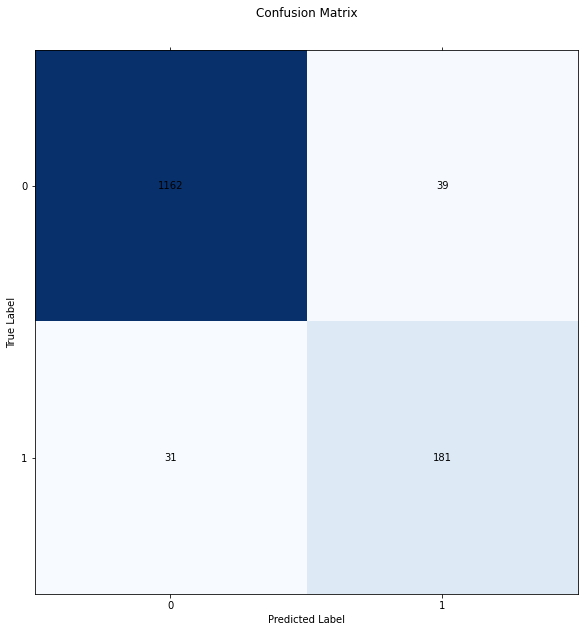

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))

intersection_matrix = cm

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(2):
    for j in range(2):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.xticks(range(0, 2))
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(np.arange(0, 2, step=1))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [56]:
1162 + 70 + 181

1413

In [88]:
y = test['injury_report'].tolist()

In [89]:
fn = []
fp = []
ind = []
for i in range(len(model_outputs)):
  x = model_outputs[i];
  if x[1]>x[0] and y[i]==0:
    fp.append(wrong_predictions[0][i])
  elif x[0]>x[1] and y[i]==1:
    fn.append(wrong_predictions[0][i])
print(fp)
print(len(fp))
print(fn)
print(len(fn))

['wednesday adam engel certain game start say tony return activate soon tomorrow late sunday russa', 'clement left hurt come single sure eddie short indian rosario chang early', 'backup say cora tuesday work rest connor alex wong schedule shoulder christian day vazquez serve currently redsox', 'go doesn information morning say boone test frazier additional', 'oblique andrew optione nat restricted austin land voth starlin strain harper list stevenson ryne castro', 'stassi check game take foul stay ball shake trainer mask', 'wednesday pitch game note corbin scherzer rest lester thursday starter tomorrow day normal national extra tba today', 'instead available hurt suarez game girardi feliz fifth neftali wasn ranger probably', 'collapse come discuss 1000 cub espn', 'year injury', 'icymi rupert jeanette arrive recognize man nurse ctl6z4es9j true sunday star twin help paramedic mlb amp healthpartner action have game https trip seizure fanatic icu spring', 'roster doubleheader activate man p

In [93]:
train

,tweet,injury_report
924,katzman83 yes,0
3056,allow inning run peralta shutout wily tonight ...,0
1811,arrieta push jake say work hesitation figure s...,0
3605,toe leg stub chair,0
3331,mullin get 9th tie gig relax dude break oriole...,0
...,...,...
6364,start friday webb,1
5341,single ramirez make indian,0
3876,oppose available have player arm prioritize be...,0
828,foul https wum5o7vd9r,0


In [90]:
fn

['sixth lineup game start dodger x9kwlojyty https consecutive betts mookie',
 'go pitch say ray fcl chris archer outing durham saturday',
 'game mound https squadup 1uq2n3wdij jamo',
 'aquino game aristede take hbp castellanos',
 'martinez rivera national baseball pitch help gome return clear avila able hasn barrera update timetable ren run routine say veteran note catcher understand',
 'roster umiamihealth https update present qrsildjysa today',
 'martinez rivera national baseball pitch help gome return clear avila able hasn barrera update timetable ren run routine say veteran note catcher understand',
 'look ahead harrison nat return fedde homer schedule final soto rusty wasn padre',
 'cora marwin unavailable think hamstre tonight avoid gonzalez probably',
 'go pick today',
 'come morgan tonight pitch cub chafin game option leave kimbrel william fresh thompson inning arrieta week miss winkler brother wieck probably',
 'cktk72qzyk lineup start https cub cubtogether today',
 'come sund

In [91]:
fp

['wednesday adam engel certain game start say tony return activate soon tomorrow late sunday russa',
 'clement left hurt come single sure eddie short indian rosario chang early',
 'backup say cora tuesday work rest connor alex wong schedule shoulder christian day vazquez serve currently redsox',
 'go doesn information morning say boone test frazier additional',
 'oblique andrew optione nat restricted austin land voth starlin strain harper list stevenson ryne castro',
 'stassi check game take foul stay ball shake trainer mask',
 'wednesday pitch game note corbin scherzer rest lester thursday starter tomorrow day normal national extra tba today',
 'instead available hurt suarez game girardi feliz fifth neftali wasn ranger probably',
 'collapse come discuss 1000 cub espn',
 'year injury',
 'icymi rupert jeanette arrive recognize man nurse ctl6z4es9j true sunday star twin help paramedic mlb amp healthpartner action have game https trip seizure fanatic icu spring',
 'roster doubleheader act

In [57]:
len(model_outputs)

1413

In [52]:
len(wrong_predictions[0])

1413

In [74]:
lst

[array([-1.51171875,  1.15234375]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93554688]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93457031]),
 array([-2.05664062,  1.93261719]),
 array([-2.05859375,  1.93554688]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93457031]),
 array([-2.05078125,  1.92285156]),
 array([-2.05859375,  1.93554688]),
 array([-2.05859375,  1.93457031]),
 array([-2.05664062,  1.93457031]),
 array([-2.05859375,  1.93554688]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93554688]),
 array([-2.05664062,  1.93261719]),
 array([-1.94140625,  1.69726562]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93554688]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93457031]),
 array([-2.05859375,  1.93554688]),
 array([-2.05859375,  1.9345

In [60]:
181/212

0.8537735849056604